**MULTIDIMENSION MOTIF DISCOVERY**

In [4]:
from IPython.display import IFrame

In [5]:
!pip install scipy>=1.5
!pip install stumpy

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import stumpy
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

In [3]:

data1=df =pd.read_csv('/content/drive/MyDrive/daily_average_road_intersection_traffic_volume[1].csv')  
data1

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2020,2,NaN,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...,...,...
62,2021,11,23230.714286,23183.285714,24098.857143,24803.857143,25985.000000,23129.571429,19230.857143
63,2021,12,25899.333333,21727.500000,24844.142857,30712.750000,32193.125000,23505.857143,23018.375000
64,2021,13,24616.857143,29582.875000,30693.125000,26878.571429,31486.125000,21356.428571,16289.857143
65,2021,14,24499.857143,24615.000000,24683.571429,24832.714286,26124.571429,23013.428571,19079.142857


In [4]:
data2=pd.read_excel('/content/drive/MyDrive/Released Records_21FO003112 (1) (1).xlsx')  
data2

,Date,Austin Bergstrom International (AUS)
0,2021-03-22,13233
1,2021-03-21,16360
2,2021-03-20,10634
3,2021-03-19,12608
4,2021-03-18,13436
...,...,...
807,2019-01-05,16446
808,2019-01-04,19516
809,2019-01-03,21204
810,2019-01-02,22821


In [5]:
data2['Day'] = data2['Date'].dt.day_name()
  
data2
df = pd.DataFrame()    
df=data2

In [6]:
df.head(50)

,Date,Austin Bergstrom International (AUS),Day
0,2021-03-22,13233,Monday
1,2021-03-21,16360,Sunday
2,2021-03-20,10634,Saturday
3,2021-03-19,12608,Friday
4,2021-03-18,13436,Thursday
5,2021-03-17,12136,Wednesday
6,2021-03-16,13270,Tuesday
7,2021-03-15,17140,Monday
8,2021-03-14,16181,Sunday
9,2021-03-13,15083,Saturday


In [7]:
df=df.sort_values(by=['Date'],ignore_index=True)

In [8]:

df['week_number'] = df['Date'].dt.week
df.head(812)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,Date,Austin Bergstrom International (AUS),Day,week_number
0,2019-01-01,20946,Tuesday,1
1,2019-01-02,22821,Wednesday,1
2,2019-01-03,21204,Thursday,1
3,2019-01-04,19516,Friday,1
4,2019-01-05,16446,Saturday,1
...,...,...,...,...
807,2021-03-18,13436,Thursday,11
808,2021-03-19,12608,Friday,11
809,2021-03-20,10634,Saturday,11
810,2021-03-21,16360,Sunday,11


In [9]:
dfinal2 = df.iloc[370:811]
dfinal2

,Date,Austin Bergstrom International (AUS),Day,week_number
370,2020-01-06,21480,Monday,2
371,2020-01-07,18086,Tuesday,2
372,2020-01-08,18066,Wednesday,2
373,2020-01-09,20787,Thursday,2
374,2020-01-10,21837,Friday,2
...,...,...,...,...
806,2021-03-17,12136,Wednesday,11
807,2021-03-18,13436,Thursday,11
808,2021-03-19,12608,Friday,11
809,2021-03-20,10634,Saturday,11


In [10]:
dfinal1= data1.iloc[0:63]
dfinal1

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2020,2,NaN,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...,...,...
58,2021,7,4480.250000,7288.000000,4888.250000,5472.400000,16518.000000,19747.428571,18807.142857
59,2021,8,24419.285714,24335.714286,25333.142857,24376.428571,25410.857143,22065.428571,18071.285714
60,2021,9,22816.000000,24032.000000,24809.000000,25338.571429,26544.285714,23229.857143,19168.142857
61,2021,10,24389.000000,24111.285714,24642.571429,25086.571429,27107.142857,23904.000000,17471.714286


In [11]:

dfinal1['monday'].fillna(value=24165.405893, inplace=True)
dfinal1['tuesday'].fillna(value=24961.200737, inplace=True)
dfinal1['wednesday'].fillna(value=25315.679089, inplace=True)
dfinal1['thursday'].fillna(value=25260.732173, inplace=True)
dfinal1['friday'].fillna(value=26322.776365, inplace=True)
dfinal1['saturday'].fillna(value=22405.154244, inplace=True)
dfinal1['sunday'].fillna(value=18729.522118, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [12]:
dfi1=pd.DataFrame(dfinal1)
dfinal1

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2020,2,24165.405893,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...,...,...
58,2021,7,4480.250000,7288.000000,4888.250000,5472.400000,16518.000000,19747.428571,18807.142857
59,2021,8,24419.285714,24335.714286,25333.142857,24376.428571,25410.857143,22065.428571,18071.285714
60,2021,9,22816.000000,24032.000000,24809.000000,25338.571429,26544.285714,23229.857143,19168.142857
61,2021,10,24389.000000,24111.285714,24642.571429,25086.571429,27107.142857,23904.000000,17471.714286


In [13]:
day=[]
tra=[]
ind=[]

In [14]:

for i in range(63):
  g=i+2
  for j in range(7):
    j=j+2
    day.append(dfinal1.columns[j])
    tra.append(dfinal1.iloc[i,j])
    
    ind.append(g)
len(ind)

441

In [15]:
lis=[ind,day,tra]

In [16]:
dfz1=pd.DataFrame(list(zip(ind,day,tra)), columns =['Week Number', 'Day','Traffic'])
dfz1

,Week Number,Day,Traffic
0,2,monday,24165.405893
1,2,tuesday,33166.416667
2,2,wednesday,33764.416667
3,2,thursday,33971.166667
4,2,friday,32076.666667
...,...,...,...
436,64,wednesday,24098.857143
437,64,thursday,24803.857143
438,64,friday,25985.000000
439,64,saturday,23129.571429


In [17]:
del dfinal2['Date']
del dfinal2['Day']
del dfinal2['week_number']

In [18]:
dfinal2

,Austin Bergstrom International (AUS)
370,21480
371,18086
372,18066
373,20787
374,21837
...,...
806,12136
807,13436
808,12608
809,10634


In [19]:
passenger=[]
i=370
for value in dfinal2["Austin Bergstrom International (AUS) "]:
        passenger.append(dfinal2.at[i,'Austin Bergstrom International (AUS) '])
        i=i+1
dfz1["T2"] = passenger

In [20]:
dfz1

,Week Number,Day,Traffic,T2
0,2,monday,24165.405893,21480
1,2,tuesday,33166.416667,18086
2,2,wednesday,33764.416667,18066
3,2,thursday,33971.166667,20787
4,2,friday,32076.666667,21837
...,...,...,...,...
436,64,wednesday,24098.857143,12136
437,64,thursday,24803.857143,13436
438,64,friday,25985.000000,12608
439,64,saturday,23129.571429,10634


**Here T1 is the austin traffic and T2 is Airport passenger traffic**

In [21]:
dfz1.rename(columns={'Traffic':'T1'})

,Week Number,Day,T1,T2
0,2,monday,24165.405893,21480
1,2,tuesday,33166.416667,18086
2,2,wednesday,33764.416667,18066
3,2,thursday,33971.166667,20787
4,2,friday,32076.666667,21837
...,...,...,...,...
436,64,wednesday,24098.857143,12136
437,64,thursday,24803.857143,13436
438,64,friday,25985.000000,12608
439,64,saturday,23129.571429,10634


In [22]:
del dfz1['Week Number']
del dfz1['Day']

In [23]:
dfz1=dfz1.rename(columns={'Traffic':'T1'})

In [24]:

dfz1

,T1,T2
0,24165.405893,21480
1,33166.416667,18086
2,33764.416667,18066
3,33971.166667,20787
4,32076.666667,21837
...,...,...
436,24098.857143,12136
437,24803.857143,13436
438,25985.000000,12608
439,23129.571429,10634


In [25]:

dfz1["T1"]

0      24165.405893
1      33166.416667
2      33764.416667
3      33971.166667
4      32076.666667
           ...     
436    24098.857143
437    24803.857143
438    25985.000000
439    23129.571429
440    19230.857143
Name: T1, Length: 441, dtype: float64

In [26]:
dfz1['T2']=dfz1['T2'].astype(float)


**Analysing both the time series**

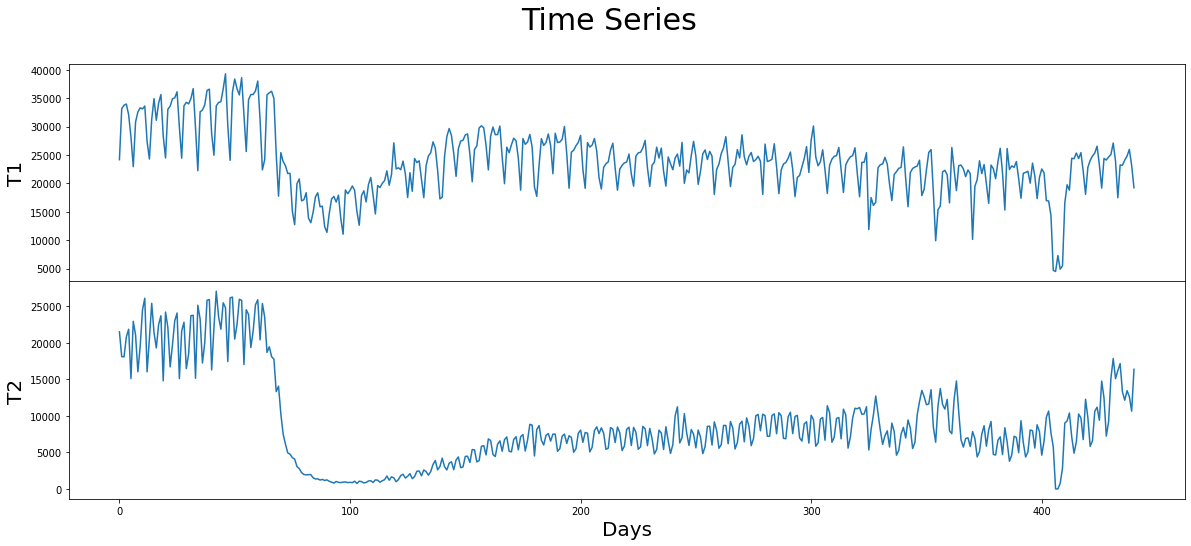

In [27]:
fig, axs = plt.subplots(dfz1.shape[1], sharex=True, gridspec_kw={'hspace': 0},figsize=(20,8))
plt.suptitle('Time Series', fontsize='30')

for i in range(dfz1.shape[1]):
    axs[i].set_ylabel(f'T{i + 1}', fontsize='20')
    axs[i].set_xlabel('Days', fontsize ='20')
    axs[i].plot(dfz1[f'T{i + 1}'])

plt.show()

**Classic 1-dimensional motif discovery algorithm on each of the dimensions independently (using a window size of m = 7) and extract 1-dimensional motif pairs:**

In [28]:
m = 7
mps = {}  # Store the 1-dimensional matrix profiles
motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)
for dim_name in dfz1.columns:
    mps[dim_name] = stumpy.stump(dfz1[dim_name], m)
    motif_distance = np.round(mps[dim_name][:, 0].min(), 1)
    print(f"The motif pair matrix profile value in {dim_name} is {motif_distance}")
    motifs_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[:2]

/usr/local/lib/python3.7/dist-packages/stumpy/stump.py:350: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  ndist_counts = core._count_diagonal_ndist(diags, m, n_A, n_B)


The motif pair matrix profile value in T1 is 0.1
The motif pair matrix profile value in T2 is 0.1


**I have plotted the raw times series along with their independently discovered motifs (thick red lines)**

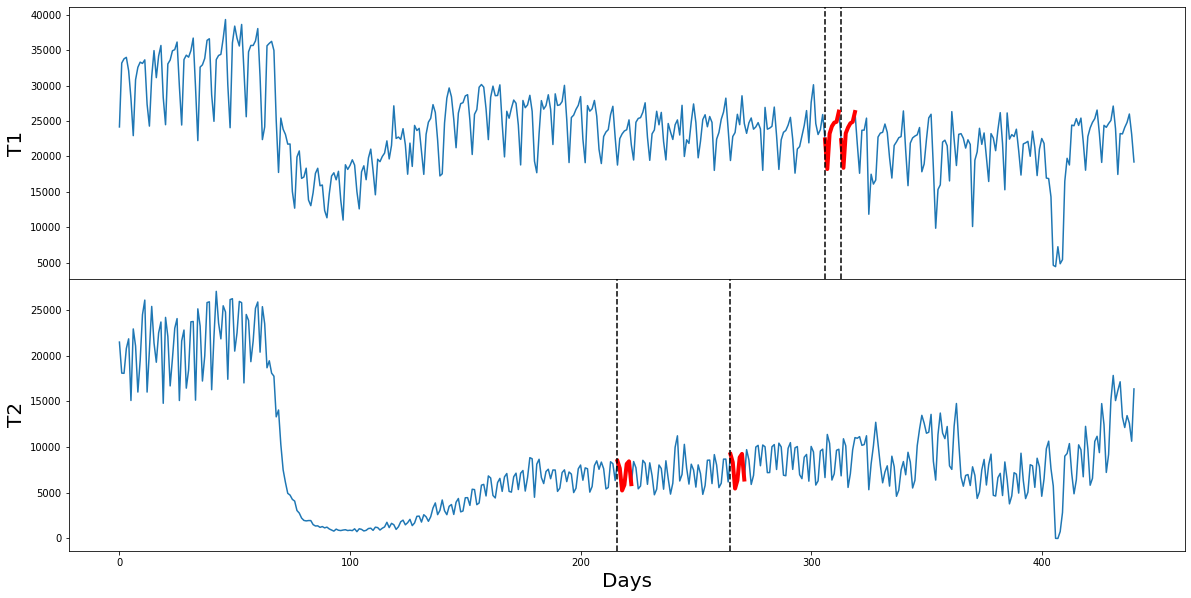

In [29]:
fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0},figsize=(20,10))

for i, dim_name in enumerate(list(mps.keys())):
    axs[i].set_ylabel(dim_name, fontsize='20')
    axs[i].plot(dfz1[dim_name])
    axs[i].set_xlabel('Days', fontsize ='20')
    for idx in motifs_idx[dim_name]:
        axs[i].plot(dfz1[dim_name].iloc[idx:idx+m], c='red', linewidth=4)
        axs[i].axvline(x=idx, linestyle="dashed", c='black')

plt.show()

**multi-dimensional matrix profile**

In [30]:
mps, indices = stumpy.mstump(dfz1, m)

**k-dimensional motif can be found by locating the two lowest values in the correspond k-dimensional matrix profile**

In [31]:
motifs_idx = np.argsort(mps, axis=1)[:, :2]

**We can plot the k-dimensional matrix profile (green lines) for all possible values of k (i.e., P1, P2) alongside the original time series data (blue lines)**

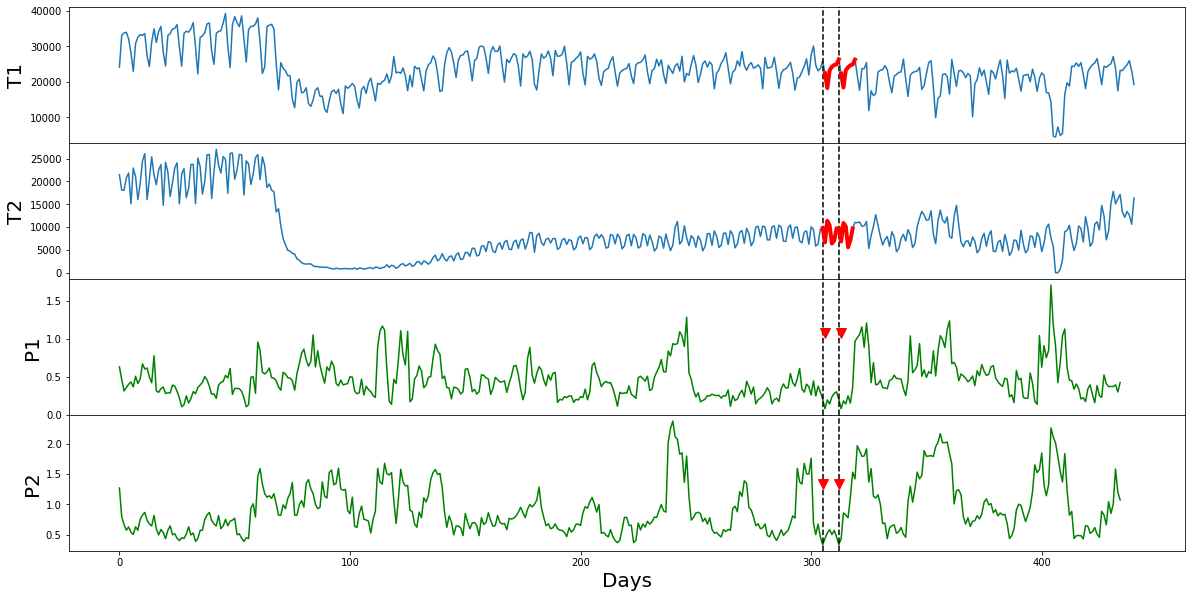

In [32]:
fig, axs = plt.subplots(mps.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 0},figsize=(20,10))

for k, dim_name in enumerate(dfz1.columns):
    axs[k].set_ylabel(dim_name, fontsize='20')
    axs[k].plot(dfz1[dim_name])
    axs[k].set_xlabel('Time', fontsize ='20')

    axs[k + mps.shape[0]].set_ylabel(dim_name.replace('T', 'P'), fontsize='20')
    axs[k + mps.shape[0]].plot(mps[k], c='green')
    axs[k + mps.shape[0]].set_xlabel('Days', fontsize ='20')

    axs[k].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='black')
    axs[k].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='black')
    if dim_name == 'T2'or dim_name=='T1': 
        axs[k].plot(range(motifs_idx[k, 0], motifs_idx[k, 0] + m), dfz1[dim_name].iloc[motifs_idx[k, 0] : motifs_idx[k, 0] + m], c='red', linewidth=4)
        axs[k].plot(range(motifs_idx[k, 1], motifs_idx[k, 1] + m), dfz1[dim_name].iloc[motifs_idx[k, 1] : motifs_idx[k, 1] + m], c='red', linewidth=4)
        axs[k + mps.shape[0]].plot(motifs_idx[k, 0], mps[k, motifs_idx[k, 0]] + 1, marker="v", markersize=10, color='red')
        axs[k + mps.shape[0]].plot(motifs_idx[k, 1], mps[k, motifs_idx[k, 1]] + 1, marker="v", markersize=10, color='red')
plt.show()

**Plotting the minimum matrix profile value in each dimension against k and then you looking for the "turning point" to find appropriate k**

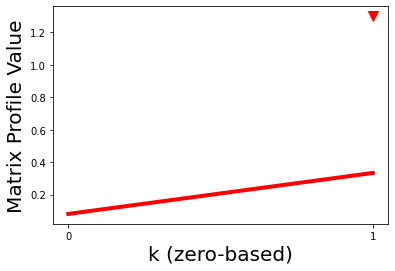

In [33]:

plt.plot(mps[range(mps.shape[0]), motifs_idx[:, 0]], c='red', linewidth='4')
plt.xlabel('k (zero-based)', fontsize='20')
plt.ylabel('Matrix Profile Value', fontsize='20')
plt.xticks(range(mps.shape[0]))
plt.plot(1, 1.3, marker="v", markersize=10, color='red')
plt.show()

**Submitted By:**

**Sakshi Pandey**

**Indian Institute Of Technology, Indore**